In [237]:
import pandas as pd
import numpy as np


import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from matplotlib import pyplot
#rcParams['figure.figsize'] = 12, 4

# 10 Introduction to the MNIST Digit Dataset (Extra Chapter)
This is an extra chapter based on the famous MNIST-dataset consisting of images of handwritten digits.

* data can be found at kaggle: 
https://www.kaggle.com/vikramtiwari/mnist-numpy
* a part of this tutorial was borrowed from Richard Corrado:
https://richcorrado.github.io/MNIST_Digits-overview.html

The MNIST digit database is a very popular database for studying machine learning techniques, especially pattern-recognition methods. There are many reasons for this, but in particular, a large amount of preprocessing has already been done in translating the images to a machine encoding consisting of greyscale pixel values. Therefore the student/researcher can investigate further preprocessing, but can also directly apply machine learning techniques to a very clean dataset, without any preprocessing. Furthermore, it is a standardized dataset that allows for comparison of results with published approaches and error rates.

### 10.1 Loading Numpy Data

Unlike the previous data, this time the data is stored as a numpy '.npz' file. This has not to worry us, because with the following routine the data can be easily read in.

In [240]:
def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data('../data/mnist.npz')

Since we received a multidimensional numpy array instead of a pandas DataFrame, we'll dive into numpy a bit and come back to pandas later. First, let's look at the train data:

In [241]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Well, except for a lot of zeros there is not really anything to see here. Maybe we should get a broader overview first. Let's have a look at the structure of the data.

* **! TODO:** Use the numpy command `.shape` to display the dimensions of the four loaded data structures. 

* **! TODO:** Answer the following questions:
1. How many samples are there (for each training and test data)? 
2. How many features does a sample consist of (for each training and test data)? 
3. How are the labels (categories) of the samples stored?

In [228]:
## YOUR CODE STARTS HERE#
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
## YOUR CODE ENDS HERE#

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### your answer:
Number of Samples:  
Train Data: 60000  
Test Data: 10000  

Number of Featrures:  
Train Data: 28 x 28 = 784  
Test Data: 28 x 28 = 784 

How are the labels (categories) of the samples stored?  
-> in y_train and y_test

### 10.2 Visualizing The Data

Now that we have learned a little more about the structure of the data, let's look at individual handwritten digits. For this data set, we can select individual samples using their index. For example, the next cell outputs the 14810th sample using the `.print()` command.

In [243]:
index = 14810
single_sample = x_train[index]
single_label = y_train[index]

print(single_sample)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  16 101 224 249 126   8   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  84 254 254 254 254 207 155  40   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  84 236 145  72 139 219 254 247  20   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  57  41   0   0   0   2  89 238 109   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 203 205   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  67 23

This is the format of a typical numpy array, but it is a bit large to display well in the notebook. If we drop all of the rows and columns that are all zeros, we can display the nonzero part of the matrix in a fairly compact form:

In [245]:
cropped = single_sample[~np.all(single_sample == 0, axis=1)]
cropped = cropped[:,~np.all(cropped == 0, axis=0)]
print(cropped)

[[ 16 101 224 249 126   8   0   0   0   0   0   0   0]
 [ 84 254 254 254 254 207 155  40   0   0   0   0   0]
 [ 84 236 145  72 139 219 254 247  20   0   0   0   0]
 [ 57  41   0   0   0   2  89 238 109   0   0   0   0]
 [  0   0   0   0   0   0   0 203 205   0   0   0   0]
 [  0   0   0   0   0   0  67 239 183   0   0   0   0]
 [  0   0   0   0   0   5 243 254 103   0   0   0   0]
 [  0   0   0   0  16 110 254 164   2   0   0   0   0]
 [  2   6   6  55 145 254 164   9   0   0   0   0   0]
 [ 84 254 254 254 254 228   0   0   0   0   0   0   0]
 [ 84 254 255 254 254 232 139  20   0   0   0   0   0]
 [  2   5   5   5  90 197 254 168 231 110   3   0   0]
 [  0   0   0   0   0  27  62 145 217 254  94   0   0]
 [  0   0   0   0   0   0   0   0   9  69 166   9   0]
 [  0   0   0   0   0   0   0   0   0  26 180 203  51]
 [  0   0   0   0   0   0   0   0   0   0  32 254 223]
 [  0   0   0   0   0   0   0   0   0   0 129 254 206]
 [  0 159 146 164 219 217 115  32  71 151 252 251  39]
 [  0 235 

If you look carefully, you might be able to recognize the digit that's been drawn.

We can get a better visualization of the digit by using matplotlib. Matplotlib conveniently provides a function `matshow()` to make a 2d plot of the entries of a matrix:

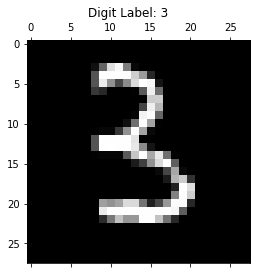

In [247]:
plt.matshow(single_sample, cmap=plt.cm.gray)
plt.suptitle("Digit Label: %d" % y_train[index])
plt.show()

The code below does the following:

1. Chooses 16 random digits between `0` and the `number of training samples - 1` as indices.
2. Use the matplotlib subplots function to generate 4 columns and 4 rows of subfigures.
3. Loop over the cells of this collection filling in the cells with a plot. Give the subplot a title corresponding to the known label of the digit.

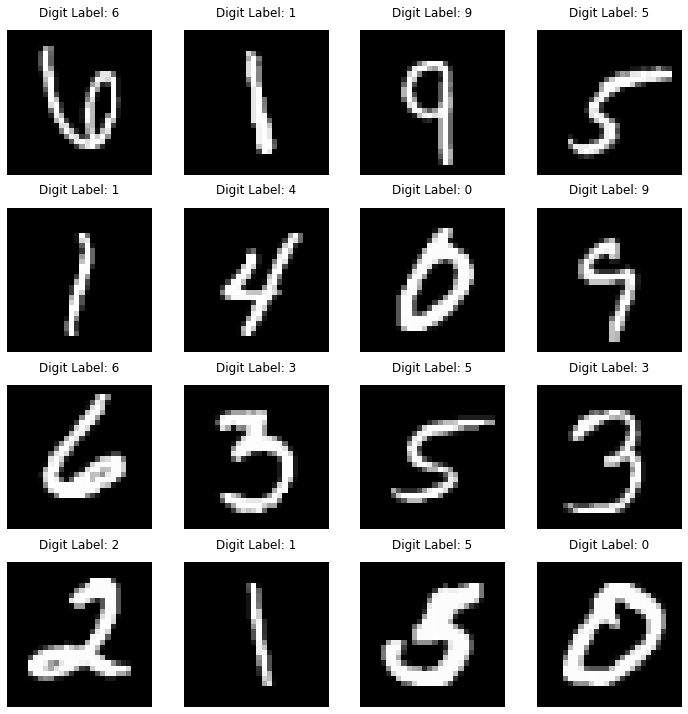

In [232]:
# generate a list of 16 random rows which are our digits
rand_idx = np.random.randint(0, len(x_train), size=16)
# generate a 4x4 grid of subplots
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10,10))

# define counter over rand_idx list elements
i = 0
# axs is a 4x4 array so we flatten it into a vector in order to loop over it
for ax in axs.reshape(-1):
    # Title is digit label, which can be found by referencing the label column of the row specified by rand_idx[i]
    ax.set_title("Digit Label: %d" % y_train[rand_idx[i]])
    ax.matshow(x_train[rand_idx[i]], cmap=plt.cm.gray)
    ax.axis('off')
    i += 1
# tight_layout gives more spacing between subplots    
plt.tight_layout()   
# Tell matplotlib to draw all of the previously generated objects
plt.show()

### 10.3. Zero Padding

As we ran the plot commands, we should also see that there is a consistent padding of blank pixels around the images. In practical terms, this means that some of our features simply take the value 0 with no variation over the training and/or test set. Depending on your machine learning approach, those features may be not be useful for later predictions, in a sense, we might have wasted some of our learning budget on a useless feature.

Using numpy's `.all()` command we can determine which pixels are 0 over the entire training set `x_train`. Again, we can visiualise the pixel matrix using `matshow()`.

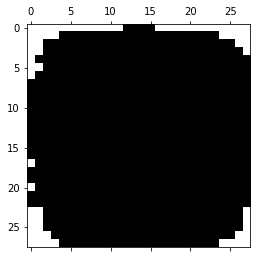

In [233]:
plt.matshow((x_train == 0).all(axis=0), cmap=plt.cm.gray)

### 10.4. Frequency Distribution of Digits

A data analysis question we might ask is whether we have equal numbers of each digit appearing in the dataset, or if some digits are favored over another? This might affect our machine learning problem, because if a particular digit was very rare in the dataset, it might be relatively hard to learn how to distinguish that digit from the others.

To answer this question, we move to known waters and transform the dataset into pandas dataframes. 

In [252]:
y_train_pandas = pd.Series(y_train, name="train")
y_test_pandas = pd.Series(y_test, name="test")


* **! TODO:** Compare the frequency distributions of the digits between training and test data. To do this, perform the steps below:
1. Obtain the normalized frequency of each digits for both training and test data.
2. Combine those two statistics into a single dataframe.
3. Plot the derived dataframe as bar chart

In [257]:
## YOUR CODE STARTS HERE#


array([<matplotlib.axes._subplots.AxesSubplot object at 0x16bd552d0>,
      dtype=object)

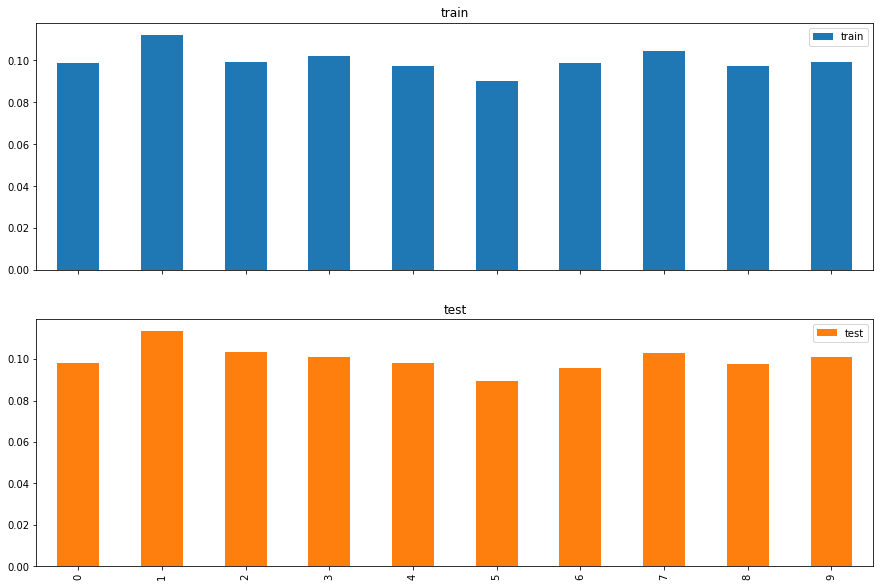

In [258]:
#Solution:

train_count = y_train_pandas.value_counts(normalize=True)
test_count = y_test_pandas.value_counts(normalize=True)

concat_counts = pd.concat([train_count, test_count], axis=1)

concat_counts.plot(kind='bar', subplots=True, figsize=(15, 10))

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  